In [5]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()


def analyze_sentiment(text):
    if not isinstance(text, str):
        return "Neutral"
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    
    if compound_score >= 0.05:
        return "Positive"
    elif compound_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df = pd.read_csv('./mining/reddit_clean.csv')

print(df.head())

df['title_sentiment'] = df['title'].apply(analyze_sentiment)
df['text_sentiment'] = df['selftext'].apply(analyze_sentiment)

df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/alireza/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


         author author_flair_text  created_utc distiguished edited       id  \
0  Ghosthands77               NaN   1677543402          NaN  False  11drhhe   
1  EmeraldLight               NaN   1673322558          NaN  False  107znsf   
2    airbiscuit               NaN   1581266655          NaN  False   f1b5pk   
3  EmeraldLight               NaN   1527435680          NaN  False   8mijhu   
4  EmeraldLight               NaN   1527435664          NaN  False   8mijfq   

   is_original_content  is_self        name  num_comments  over_18  \
0                False     True  t3_11drhhe             7    False   
1                False     True  t3_107znsf             4    False   
2                False    False   t3_f1b5pk             1    False   
3                False    False   t3_8mijhu             4    False   
4                False    False   t3_8mijfq             0    False   

                                           permalink  score  \
0  https://www.reddit.com/r/FortStJohn/co

,author,author_flair_text,created_utc,distiguished,edited,id,is_original_content,is_self,name,num_comments,over_18,permalink,score,selftext,subreddit,title,upvote_ratio,url,title_sentiment,text_sentiment
0,Ghosthands77,NaN,1677543402,NaN,False,11drhhe,False,True,t3_11drhhe,7,False,https://www.reddit.com/r/FortStJohn/comments/1...,7,,FortStJohn,hey guys/gals! i heard that the bottle depot w...,1.00,https://www.reddit.com/r/FortStJohn/comments/1...,Negative,Neutral
1,EmeraldLight,NaN,1673322558,NaN,False,107znsf,False,True,t3_107znsf,4,False,https://www.reddit.com/r/FortStJohn/comments/1...,5,"i can't see it from my place, but i've seen fi...",FortStJohn,anyone witnessing the peace counter trailer pa...,1.00,https://www.reddit.com/r/FortStJohn/comments/1...,Positive,Positive
2,airbiscuit,NaN,1581266655,NaN,False,f1b5pk,False,False,t3_f1b5pk,1,False,https://www.reddit.com/r/FortStJohn/comments/f...,6,,FortStJohn,early morning fire destroys two duplexes in fo...,1.00,https://www.energeticcity.ca/2020/02/early-mor...,Negative,Neutral
3,EmeraldLight,NaN,1527435680,NaN,False,8mijhu,False,False,t3_8mijhu,4,False,https://www.reddit.com/r/FortStJohn/comments/8...,6,,FortStJohn,firefighters respond to apartment building fir...,1.00,https://www.energeticcity.ca/2018/05/firefight...,Negative,Neutral
4,EmeraldLight,NaN,1527435664,NaN,False,8mijfq,False,False,t3_8mijfq,0,False,https://www.reddit.com/r/FortStJohn/comments/8...,3,,FortStJohn,tommy lakes forest fire causes evacuation at n...,0.81,https://www.energeticcity.ca/2018/05/tommy-lak...,Negative,Neutral


In [6]:
df = df[df['created_utc'] >= 1677654056]
print(df.head())
df['time'] = pd.to_datetime(df['created_utc'], unit='s')

             author author_flair_text  created_utc distiguished edited  \
9      EmeraldLight               NaN   1684190494          NaN  False   
10  AirplaneFixer99               NaN   1684536890          NaN  False   
19      ReaderMomma               NaN   1691751774          NaN  False   
23    ubcstaffer123               NaN   1696102891          NaN  False   
24    AutoModerator               NaN   1696062650          NaN  False   

         id  is_original_content  is_self        name  num_comments  over_18  \
9   13in3b0                False    False  t3_13in3b0             7    False   
10  13mahza                False    False  t3_13mahza             2    False   
19  15o5t72                False     True  t3_15o5t72             6    False   
23  16wfu4b                False    False  t3_16wfu4b             2    False   
24  16w1ipw                False     True  t3_16w1ipw             7    False   

                                            permalink  score  \
9   https:

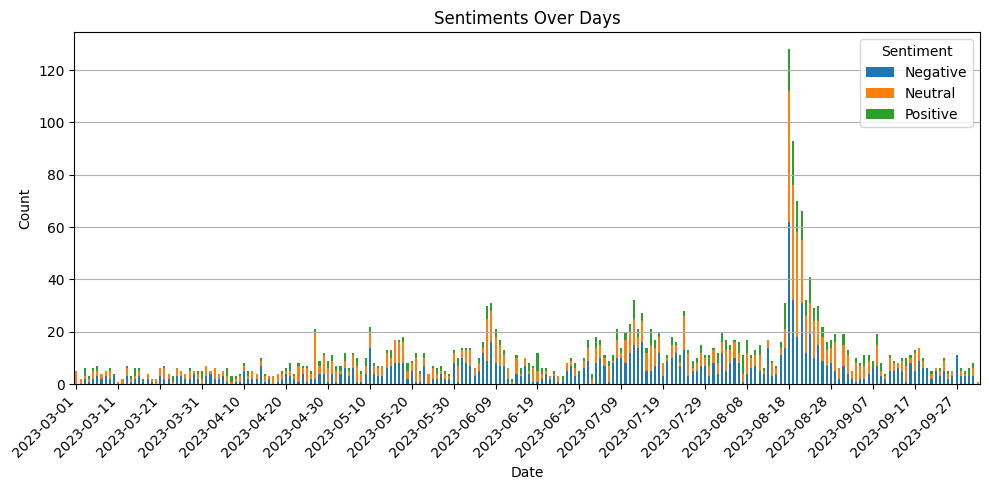

In [7]:
import matplotlib.pyplot as plt


daily_sentiments = df.groupby(df['time'].dt.date)['title_sentiment'].value_counts().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(10, 5))
daily_sentiments.plot(kind='bar', stacked=True, ax=ax)
plt.title('Sentiments Over Days')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])

date_labels = daily_sentiments.index[::10]
date_positions = range(0, len(daily_sentiments.index), 10)
plt.xticks(date_positions, date_labels, rotation=45, ha="right")

plt.grid(axis='y')
plt.tight_layout() 
plt.show()

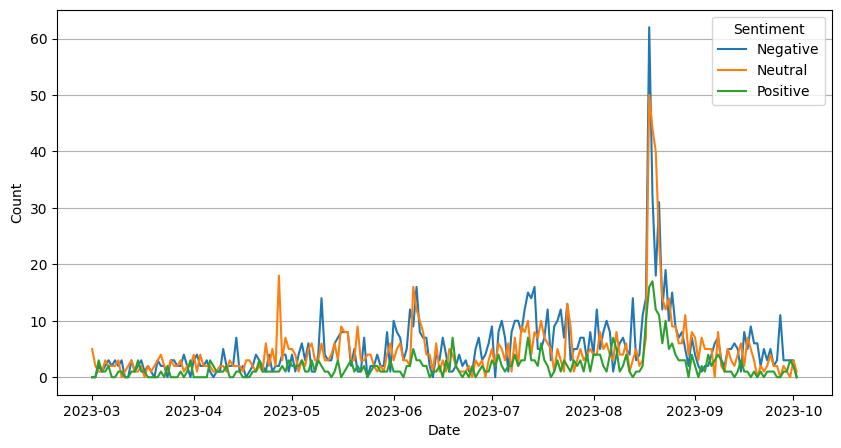

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

df['time'] = pd.to_datetime(df['created_utc'], unit='s')

daily_sentiments = df.groupby([df['time'].dt.date, 'title_sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 5))
for sentiment in ['Negative', 'Neutral', 'Positive']:
    plt.plot(daily_sentiments.index, daily_sentiments[sentiment], label=sentiment)

plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.grid(axis='y')
plt.show()